In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import re
import json
from pandas.io.json import json_normalize
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Read data and assign NA to missing values 
crimedata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])

crimedata.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print(crimedata)

           communityname state  countyCode  communityCode  fold  population  \
0         Marpletownship    PA        45.0        47616.0     1       23123   
1             Tigardcity    OR         NaN            NaN     1       29344   
2       Gloversvillecity    NY        35.0        29443.0     1       16656   
3            Bemidjicity    MN         7.0         5068.0     1       11245   
4        Springfieldcity    MO         NaN            NaN     1      140494   
...                  ...   ...         ...            ...   ...         ...   
2209          Mercedcity    CA         NaN            NaN    10       56216   
2210       Pinevillecity    LA         NaN            NaN    10       12251   
2211         Yucaipacity    CA         NaN            NaN    10       32824   
2212        Beevillecity    TX         NaN            NaN    10       13547   
2213  WestSacramentocity    CA         NaN            NaN    10       28898   

      householdsize  racepctblack  racePctWhite  ra

In [17]:
crimedata.describe()

,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,993.000000,990.000000,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2123.000000,2123.000000,1993.000000,2117.000000
mean,65.614300,45249.543434,5.496387,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,...,761.574853,1033.845663,2138.533695,3373.992673,516.919041,474.120629,30.921338,32.161098,589.353914,4909.901535
std,117.887749,25407.038920,2.871984,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,...,3112.366074,763.276945,7602.173806,1901.148488,3258.883890,504.727524,180.166592,39.248657,614.816135,2739.290947
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,11.000000,22970.000000,3.000000,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,...,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.670000,161.730000,2921.280000
50%,27.000000,46983.500000,5.000000,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,...,205.000000,822.890000,747.000000,3081.290000,75.000000,303.090000,5.000000,21.110000,374.070000,4426.270000
75%,81.000000,65812.500000,8.000000,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,...,508.000000,1351.095000,1675.000000,4335.630000,233.000000,589.780000,16.000000,42.865000,794.410000,6230.240000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [3]:
crimedata['ViolentCrimesPerPop'].describe()

count    1993.000000
mean      589.353914
std       614.816135
min         0.000000
25%       161.730000
50%       374.070000
75%       794.410000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



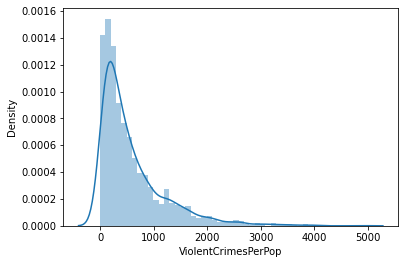

In [4]:
sns.distplot(crimedata['ViolentCrimesPerPop']);

In [5]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['ViolentCrimesPerPop'].skew())
print("Kurtosis: %f" % crimedata['ViolentCrimesPerPop'].kurt())

Skewness: 2.066603
Kurtosis: 5.595207


In [6]:
crimedata['nonViolPerPop'].describe()

count     2117.000000
mean      4909.901535
std       2739.290947
min        116.790000
25%       2921.280000
50%       4426.270000
75%       6230.240000
max      27119.760000
Name: nonViolPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



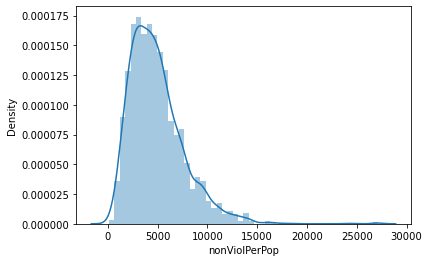

In [7]:
sns.distplot(crimedata['nonViolPerPop']);

In [8]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['nonViolPerPop'].skew())
print("Kurtosis: %f" % crimedata['nonViolPerPop'].kurt())

Skewness: 1.587533
Kurtosis: 5.916430


Relationship with numerical variables

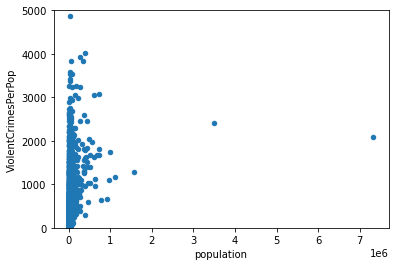

In [9]:
#scatter plot population/ViolentCrimesPerPop
var = 'population'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));

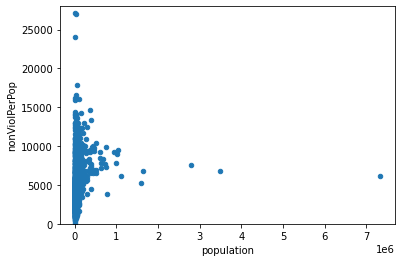

In [10]:
#scatter plot population/nonViolPerPop
var = 'population'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));

In [11]:
crimedata['PopDens'].describe()

count     2214.000000
mean      2784.258672
std       2829.562169
min         10.000000
25%       1181.850000
50%       2029.600000
75%       3322.250000
max      44229.900000
Name: PopDens, dtype: float64

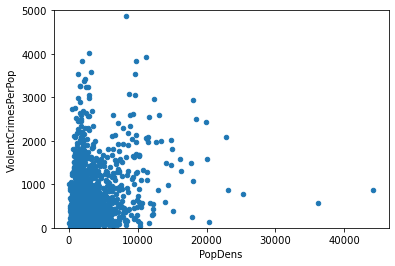

In [12]:
#scatter plot PopDens/ViolentCrimesPerPop
var = 'PopDens'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));

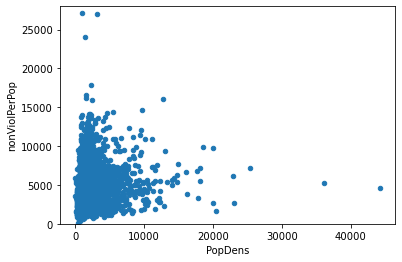

In [13]:
#scatter plot PopDens/nonViolPerPop
var = 'PopDens'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));

Relationship with categorical features

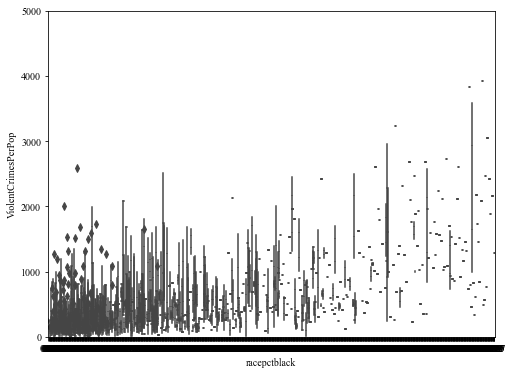

In [19]:
#box plot racepctblack/ViolentCrimesPerPop
var = 'racepctblack'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ViolentCrimesPerPop", data=data)
fig.axis(ymin=0, ymax=5000);

Correlation matrix

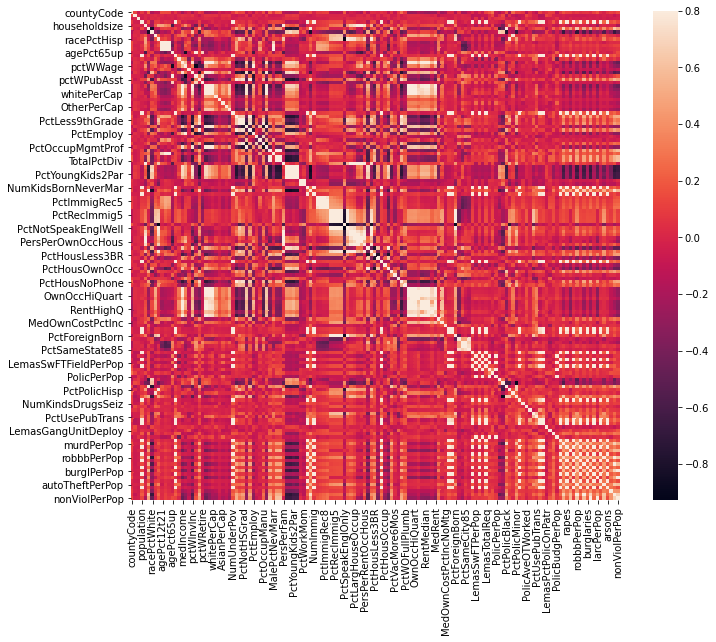

In [14]:
#correlation matrix
corrmat = crimedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

plt.rcParams["font.family"] = "Times New Roman"

In [16]:
#group Violent crime and nonViolent crime by state
crimedata_state = df.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

##Aggregate view of Non-Violent Crimes by State
data1 = dict(type='choropleth',
        colorscale = 'ylgnbu',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(0,0,0)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

NameError: name 'df' is not defined

In [ ]:
##Aggregate view of Violent Crimes by state
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "ylgnbu",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Violent Crimes Per 100K Population'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

In [ ]:
## Check if there is multicollinearity between any of the explanatory variables under study
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
crimedata_study = df.filter(cols, axis=1)
corr_crimedata_study = crimedata_study.corr()
iv_corr = corr_crimedata_study.iloc[:-10,:-10]
multicol_limit = 0.3
iv_corr = (iv_corr[abs(iv_corr) > multicol_limit][iv_corr != 1.0]).unstack().to_dict()
iv_multicoll_corr = pd.DataFrame(list(set([(tuple(sorted(key)), iv_corr[key]) for key in iv_corr])), 
        columns=['Independent Variables', 'Correlation Coefficient'])
print (iv_multicoll_corr[iv_multicoll_corr.notnull().all(axis=1)])

In [ ]:
# Let's find out the outliers in `ViolentCrimesPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(df['ViolentCrimesPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_viol = df.loc[df['ViolentCrimesPerPop']>upper_bound,['communityName','state','ViolentCrimesPerPop']]


## Let's find out the outliers in `nonViolPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(df['nonViolPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_nviol = df.loc[df['nonViolPerPop']>upper_bound,['communityName','state','nonViolPerPop']]

## Remove community Name(s) ending with "city". This helps dataframe(s) merging easier to get lat and lon
outliers_viol['communityName'] = outliers_viol['communityName'].map(lambda result : re.sub(r'city','',result))
outliers_nviol['communityName'] = outliers_nviol['communityName'].map(lambda result : re.sub(r'city','',result))

## read citie.json file to get latitude and longitude details of the cities
file = "cities.json"
with open(file) as city_file:
   dict_city = json.load(city_file)
cities_lat_lon = json_normalize(dict_city)
#print (cities_lat_lon.info())
## Cities with highest  non-violent crime rate
levels = [(0,20),(21,30),(31,40),(41,50),(51,80)]
colors = ['rgb(255,133,27)','rgb(31,120,180)','rgb(178,223,138)','rgb(251,154,153)','rgb(227,26,28)']
plot_data = []
for i in range(len(levels)):
    lim = levels[i]
    nonviolent_crime_cities_sub = nonviolent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = nonviolent_crime_cities_sub['longitude'],
        lat = nonviolent_crime_cities_sub['latitude'],
        text = nonviolent_crime_cities_sub['communityname'] +' '+ nonviolent_crime_cities_sub['nonViolPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = nonviolent_crime_cities_sub['nonViolPerPop']/800,
        color = colors[i],
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout1 = dict(
        title = 'Cities with highest non-Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'), 
    )
    plot_data.append(city_outline)
    
fig1= dict( data=plot_data, layout=layout1)
iplot( fig1, validate=False)

In [ ]:
## Cities with highest violent crime rate
levels = [(0,30),(31,60),(61,90),(91,120),(121,170)]
colors = ['rgb(175,175,50)','rgb(131,120,180)','rgb(78,230,138)','rgb(251,24,153)','rgb(227,126,28)']
cities = []
for i in range(len(levels)):
    lim = levels[i]
    violent_crime_cities_sub = violent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = violent_crime_cities_sub['longitude'],
        lat = violent_crime_cities_sub['latitude'],
        text = violent_crime_cities_sub['communityname'] +' '+ violent_crime_cities_sub['ViolentCrimesPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = violent_crime_cities_sub['ViolentCrimesPerPop']/200,
        color = colors[i]
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout2 = dict(
        title = 'Cities with highest Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
    ) 
    cities.append(city_outline)
    
fig2= dict( data=cities, layout=layout2)
iplot( fig2, validate=False)